In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_scratch_SBS_SFS = pd.read_csv('../../output/df/scratch_SBS_SFS_models.csv')
df_scratch_SBS_SFS.sample(n=5)

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
343,343,155,0.868566,0.857955,scratch,model_39_0.8685660840058196,4
8,8,48330,0.935678,0.931093,SBS,model_9_0.9356780883116014,18
286,286,106,0.820402,0.871356,scratch,model_14_0.8204015267219579,4
46,46,47680,0.920252,0.925179,SBS,model_10_0.9202519913262196,16
348,348,64,0.811108,0.806015,scratch,model_23_0.8111077215560312,4


## SFS, SBS model

In [3]:
top_df = pd.DataFrame()
for exp in ['SFS', 'SBS', 'scratch']:
    for num_nodes in [2, 4, 6, 8]:
        condition = (df_scratch_SBS_SFS['experiment_name'] == exp) & (df_scratch_SBS_SFS['number_nodes'] == num_nodes)
        df = df_scratch_SBS_SFS[condition].sort_values(by=['val_auc'], ascending=False)
        top_df = pd.concat([top_df, df.head(5)])

top_df

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
109,109,12,0.860762,0.849954,SFS,model_31_0.8607619264343909,2
116,116,5,0.841715,0.856642,SFS,model_35_0.8417148118091283,2
117,117,4,0.836190,0.854820,SFS,model_7_0.8361897799244687,2
115,115,6,0.829931,0.863696,SFS,model_62_0.8299306421979131,2
113,113,8,0.829600,0.841752,SFS,model_8_0.8295996799487735,2
124,124,645,0.851452,0.846498,SFS,model_10_0.8514524107554484,4
125,125,529,0.849927,0.870408,SFS,model_10_0.849926669769884,4
129,129,5402,0.842267,0.848756,SFS,model_2_0.8422668796443906,6
128,128,6451,0.840961,0.821172,SFS,model_12_0.8409609424001878,6
135,135,16577,0.892843,0.909609,SFS,model_7_0.8928431645114644,8


In [4]:
# Get mean and confidence interval for SBS and SFS
top_df.groupby(['experiment_name', 'number_nodes'])['test_auc'].agg(['mean', 'std'])
for exp in ['SFS', 'SBS']:
    for num_nodes in [2, 4, 6, 8]:
        print(f'Number of nodes: {num_nodes} in {exp}')
        # print(top_df[(top_df['experiment_name'] == 'SBS') & (top_df['number_nodes'] == num_nodes)]['test_auc'].agg(['mean', 'std']))
        # print 95% confidence interval
        test_results = top_df[(top_df['experiment_name'] == exp) & (top_df['number_nodes'] == num_nodes)]['test_auc']
        print("len", len(test_results))
        print(f'{np.mean(test_results):.3f} +- {1.96*np.std(test_results)/np.sqrt(len(test_results)):.3f}')

Number of nodes: 2 in SFS
len 5
0.853 +- 0.006
Number of nodes: 4 in SFS
len 2
0.858 +- 0.017
Number of nodes: 6 in SFS
len 2
0.835 +- 0.019
Number of nodes: 8 in SFS
len 5
0.878 +- 0.016
Number of nodes: 2 in SBS
len 2
0.813 +- 0.005
Number of nodes: 4 in SBS
len 3
0.834 +- 0.013
Number of nodes: 6 in SBS
len 4
0.873 +- 0.017
Number of nodes: 8 in SBS
len 5
0.907 +- 0.010


## NSGA-II model

In [5]:
NSGA_df = pd.read_csv('../../output/df/NSGA_models.csv')
for num_nodes in [2, 4, 6, 8]:
    print(f'Number of nodes: {num_nodes}')
    print(len(NSGA_df[NSGA_df['number_nodes'] == num_nodes].drop_duplicates(subset=['channel_id'], keep='first')))
    # print(NSGA_df[NSGA_df['number_nodes'] == num_nodes].drop_duplicates(subset=['channel_id'], keep='first').sort_values(by=['val_auc'], ascending=False).head(5)['test_auc'].agg(['mean', 'std']))
    # print 95% confidence interval
    test_results = NSGA_df[NSGA_df['number_nodes'] == num_nodes].drop_duplicates(subset=['channel_id'], keep='first').sort_values(by=['val_auc'], ascending=False).head(5)['test_auc']
    print(f'{np.mean(test_results):.3f} +- {1.96*np.std(test_results)/np.sqrt(5):.3f}')

Number of nodes: 2
10
0.837 +- 0.023
Number of nodes: 4
26
0.903 +- 0.009
Number of nodes: 6
41
0.912 +- 0.010
Number of nodes: 8
29
0.923 +- 0.003


In [6]:
NSGA_df[NSGA_df['number_nodes'] == 4].sort_values(by=['val_auc'], ascending=False)

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
102,102,138,0.912181,0.896572,scratch,model_2_0.9121808243746019,4
179,179,97,0.904336,0.909560,scratch,model_23_0.9043355359866874,4
174,174,87,0.895968,0.920093,scratch,model_21_0.8959676388449049,4
76,76,87,0.895968,0.920093,NSGA2,model_21_0.8959676388449049,4
96,96,129,0.890413,0.895620,scratch,model_8_0.8904129765655979,4
214,214,88,0.887955,0.894467,scratch,model_13_0.887954883594276,4
175,175,89,0.884845,0.884098,scratch,model_25_0.8848447220752464,4
170,170,79,0.881794,0.855443,scratch,model_27_0.881794274781781,4
172,172,83,0.880582,0.914590,scratch,model_21_0.8805824102676136,4
208,208,78,0.877032,0.882956,scratch,model_3_0.8770322225001304,4


In [7]:
df_scratch_SBS_SFS[df_scratch_SBS_SFS['number_nodes'] == 2].sort_values(by=['val_auc'], ascending=False)

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
109,109,12,0.860762,0.849954,SFS,model_31_0.8607619264343909,2
116,116,5,0.841715,0.856642,SFS,model_35_0.8417148118091283,2
117,117,4,0.836190,0.854820,SFS,model_7_0.8361897799244687,2
115,115,6,0.829931,0.863696,SFS,model_62_0.8299306421979131,2
113,113,8,0.829600,0.841752,SFS,model_8_0.8295996799487735,2
108,108,13,0.828761,0.874704,SFS,model_24_0.8287612824053294,2
121,121,0,0.828167,0.887688,SFS,model_30_0.828166996730201,2
3,3,16,0.812918,0.844690,SFS,model_6_0.8129181335024059,2
120,120,1,0.802343,0.873423,SFS,model_3_0.8023429160800547,2
112,112,9,0.799591,0.845003,SFS,model_4_0.7995909821301785,2


## FETCH model

In [8]:
df_fetch = pd.read_csv('../../output/df/FETCH_2nodes.csv')
df_fetch = df_fetch.sort_values(by=['val_auc'], ascending=False).head(5)
for num_nodes in [4, 6, 8]:
    print(f'Number of nodes: {num_nodes}')
    df = pd.read_csv(f'../../output/df/FETCH_{num_nodes}nodes.csv').sort_values(by=['val_auc'], ascending=False).head(5)
    df_fetch = pd.concat([df_fetch, df])
    
df_fetch

Number of nodes: 4
Number of nodes: 6
Number of nodes: 8


,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
0,0,0.835928,0.905499,FETCH,model_2nodes,2
12,12,0.834198,0.833827,FETCH,model_2nodes,2
16,16,0.820150,0.851760,FETCH,model_2nodes,2
1,1,0.819445,0.879042,FETCH,model_2nodes,2
4,4,0.818110,0.839989,FETCH,model_2nodes,2
96,138,0.912331,0.894822,FETCH,model_4nodes,4
82,123,0.908177,0.899641,FETCH,model_4nodes,4
87,129,0.907871,0.906678,FETCH,model_4nodes,4
95,137,0.905556,0.893127,FETCH,model_4nodes,4
97,139,0.903606,0.856557,FETCH,model_4nodes,4


In [9]:
results_on_testset = {
    0: 0.8877,
    12: 0.85,
    16: 0.8447,
    1: 0.8734,
    4: 0.8548,
    138: 0.9047,
    123: 0.9,
    129: 0.8967,
    137: 0.8982,
    139: 0.8643,
    811: 0.9174,
    345: 0.9266,
    608: 0.9167,
    1183: 0.8794,
    812: 0.8790,
    5731: 0.9110,
    5726: 0.9186,
    2475: 0.9221,
    5689: 0.9145,
    5673: 0.9198    
}
df_fetch['test_auc_on_models'] = df_fetch['channel_id'].map(results_on_testset)
# df_fetch.groupby(['number_nodes'])['test_auc_on_models'].agg(['mean', 'std'])
df_fetch

,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes,test_auc_on_models
0,0,0.835928,0.905499,FETCH,model_2nodes,2,0.8877
12,12,0.834198,0.833827,FETCH,model_2nodes,2,0.8500
16,16,0.820150,0.851760,FETCH,model_2nodes,2,0.8447
1,1,0.819445,0.879042,FETCH,model_2nodes,2,0.8734
4,4,0.818110,0.839989,FETCH,model_2nodes,2,0.8548
96,138,0.912331,0.894822,FETCH,model_4nodes,4,0.9047
82,123,0.908177,0.899641,FETCH,model_4nodes,4,0.9000
87,129,0.907871,0.906678,FETCH,model_4nodes,4,0.8967
95,137,0.905556,0.893127,FETCH,model_4nodes,4,0.8982
97,139,0.903606,0.856557,FETCH,model_4nodes,4,0.8643


In [10]:
# Confidence interval for FETCH based on the number of nodes
for num_nodes in [2, 4, 6, 8]:
    print(f'Number of nodes: {num_nodes}')
    test_results = df_fetch[df_fetch['number_nodes'] == num_nodes]['test_auc_on_models']
    print(f'{np.mean(test_results):.3f} +- {1.96*np.std(test_results)/np.sqrt(5):.3f}')

Number of nodes: 2
0.862 +- 0.014
Number of nodes: 4
0.893 +- 0.013
Number of nodes: 6
0.904 +- 0.018
Number of nodes: 8
0.917 +- 0.003


## 5.1.1: Exhaustive search methods

In [11]:
from utils import get_df_with_num_nodes
symmetric_pairs = [(0, 8), (1, 9), (2, 10), (3, 11), (4, 12), (5, 13), (6, 14), (7, 15), (18, 19)]
def symmetric_channels(channel_set):
    symmetric = True
    for ch1, ch2 in symmetric_pairs:
        if (ch1 in channel_set and ch2 not in channel_set) or (ch1 not in channel_set and ch2 in channel_set):
            symmetric = False
            break
            
    return symmetric
        
symmetric_ids = []
for num_nodes in [2, 4, 6, 8]:
    df_full = get_df_with_num_nodes(num_nodes)
    df_full['symmetric'] = df_full['channel_set'].apply(symmetric_channels)
    print(f'Number of nodes: {num_nodes}')
    print(f'Symmetric ids: {df_full[df_full["symmetric"] == True]["channel_id"].tolist()}')
    symmetric_ids.extend(df_full[df_full["symmetric"] == True]["channel_id"].tolist())

Number of nodes: 2
Symmetric ids: [2, 3]
Number of nodes: 4
Symmetric ids: [73, 83, 94, 107, 122, 138, 155, 172, 178, 179]
Number of nodes: 6
Symmetric ids: [291, 292, 415, 416, 488, 489, 579, 580, 683, 684, 787, 788, 1159, 1245, 1405, 1562, 1947, 2267, 2537, 2685, 3011, 3012, 3154, 3155]
Number of nodes: 8
Symmetric ids: [1367, 1607, 1644, 1811, 1841, 1888, 2138, 2170, 2209, 2456, 2486, 2609, 3613, 3614, 3769, 3770, 4116, 4117, 4548, 4549, 4819, 4820, 5239, 5240, 5518, 5519, 5800, 5801, 6221, 6222, 7058, 7391, 7755, 8933, 10183, 10932, 11800, 11991, 12411, 12412, 12599, 12600, 12940, 12941]


In [12]:
symmetric_df = pd.read_csv('../../output/df/symmetric_models.csv')
# Concatenate symmetric_df with df_scratch_SBS_SFS because some of the models were already in df_scratch_SBS_SFS
symmetric_df = pd.concat([df_scratch_SBS_SFS, symmetric_df])
symmetric_df = symmetric_df.drop_duplicates(subset=['channel_id'], keep='first')
symmetric_df = symmetric_df[symmetric_df['channel_id'].isin(symmetric_ids)]

# Keep only the best 5 models
symmetric_df = symmetric_df.sort_values(by=['val_auc'], ascending=False).groupby(['number_nodes']).head(5)
for num_nodes in [2, 4, 6, 8]:
    print(f'Number of nodes: {num_nodes}')
    test_results = symmetric_df[symmetric_df['number_nodes'] == num_nodes]['test_auc']
    length = len(test_results)
    print("len", length)
    print(f'{np.mean(test_results):.3f} +- {1.96*np.std(test_results)/np.sqrt(length):.3f}')
    

Number of nodes: 2
len 2
0.836 +- 0.026
Number of nodes: 4
len 5
0.892 +- 0.017
Number of nodes: 6
len 5
0.916 +- 0.001
Number of nodes: 8
len 5
0.918 +- 0.006


In [13]:
symmetric_df = pd.read_csv('../../output/df/symmetric_models.csv')
symmetric_df.sort_values('channel_id')

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
0,0,291,0.882123,0.905537,symmetric,model_10_0.8821231132904332,6
1,1,292,0.895902,0.911789,symmetric,model_12_0.8959021054072498,6
2,2,415,0.847409,0.868545,symmetric,model_10_0.8474093296055569,6
3,3,488,0.903570,0.909432,symmetric,model_9_0.9035699975619134,6
4,4,489,0.906019,0.915642,symmetric,model_7_0.9060191298983558,6
...,...,...,...,...,...,...,...
62,62,12412,0.893585,0.915726,symmetric,model_2_0.8935848421272234,8
63,63,12599,0.884328,0.914497,symmetric,model_9_0.8843282540857258,8
64,64,12600,0.887139,0.918762,symmetric,model_9_0.8871393917204794,8
65,65,12940,0.888087,0.896549,symmetric,model_7_0.8880866867086857,8


In [ ]:
# find confidence interval for the test_auc of the 5 models
for num_nodes in [2, 4]:
    print(f'Number of nodes: {num_nodes}')
    df = df_scratch_SBS_SFS[df_scratch_SBS_SFS['number_nodes'] == num_nodes].drop_duplicates(subset=['channel_id'], keep='first').sort_values(by=['val_auc'], ascending=False)
    print("Len", len(df))
    df = df.head(5)
    print(f'{np.mean(df["test_auc"]):.3f} +- {1.96*np.std(df["test_auc"])/np.sqrt(5):.3f}')



In [ ]:
df

In [16]:
# The 4-electrode models in df_scratch_SBS_SFS are not complete. In another experiment, I have run the exhaustive search on the 4-electrode models and the best results of validation AUC are for channel ids: 138, 123, 129, 137, 139
updated_auc = [0.8984, 0.8638, 0.913003, 0.904897, 0.903632]
print(f'{np.mean(updated_auc):.3f} +- {1.96*np.std(updated_auc)/np.sqrt(5):.3f}')

0.897 +- 0.015


# Section 5.2: FETCH vs Scratch

In [53]:
fetch_vs_scratch_nodes = 8
condition = (df_scratch_SBS_SFS['experiment_name'] == 'scratch') & (df_scratch_SBS_SFS['number_nodes'] == fetch_vs_scratch_nodes)
df_scratch = df_scratch_SBS_SFS[condition]

In [54]:
df_fetch = pd.read_csv('../../output/df/FETCH_{}nodes.csv'.format(fetch_vs_scratch_nodes))
df_fetch_scratch = pd.merge(df_fetch, df_scratch, on='channel_id', suffixes=('_fetch', '_scratch'), how='inner')
df_fetch_scratch

,channel_id,val_auc_fetch,test_auc_fetch,experiment_name_fetch,model_name_fetch,number_nodes_fetch,Unnamed: 0,val_auc_scratch,test_auc_scratch,experiment_name_scratch,model_name_scratch,number_nodes_scratch
0,1089,0.915879,0.909388,FETCH,model_8nodes,8,178,0.915652,0.906354,scratch,model_20_0.9156515513448391,8
1,1309,0.887561,0.904751,FETCH,model_8nodes,8,191,0.896528,0.905652,scratch,model_10_0.8965279242778018,8
2,1376,0.923214,0.901540,FETCH,model_8nodes,8,213,0.927062,0.914639,scratch,model_15_0.9270620955885532,8
3,1472,0.916583,0.920546,FETCH,model_8nodes,8,263,0.921672,0.915438,scratch,model_16_0.9216721992689655,8
4,1473,0.910282,0.923150,FETCH,model_8nodes,8,211,0.916468,0.920845,scratch,model_17_0.9164682791213904,8
...,...,...,...,...,...,...,...,...,...,...,...,...
97,12083,0.906996,0.910907,FETCH,model_8nodes,8,250,0.905536,0.911184,scratch,model_20_0.9055363270025201,8
98,12153,0.881937,0.919495,FETCH,model_8nodes,8,234,0.877909,0.900296,scratch,model_3_0.8779091437714661,8
99,12220,0.901820,0.899622,FETCH,model_8nodes,8,258,0.889782,0.889399,scratch,model_6_0.8897821039540785,8
100,13025,0.905044,0.901108,FETCH,model_8nodes,8,252,0.898606,0.913069,scratch,model_17_0.8986059316044619,8


[0.89378502 0.8927564 ] [0.90563339 0.90344907] [0.9132537  0.91192115]
[0.89378502 0.91565155] [0.88756117 0.89652792]


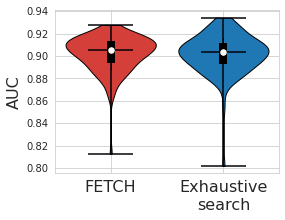

In [55]:
# Two Violin plots in the same figure for test_auc_fetch and test_auc_scratch


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
test_auc_fetch = df_fetch_scratch['val_auc_fetch'].to_numpy()
test_auc_scratch = df_fetch_scratch['val_auc_scratch'].to_numpy()
fig, ax = plt.subplots(figsize=(4, 3))

data  = np.concatenate((test_auc_fetch.reshape(-1, 1), test_auc_scratch.reshape(-1, 1)), axis=1)
parts= ax.violinplot(data, showmeans=False, showmedians=True
, showextrema=True, positions=[1, 1.5], widths=0.4)
# How can I make the violin plots closer to each other?
for idx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('#D43F3A' if idx == 0 else '#1f77b4')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=0)
print(quartile1, medians, quartile3)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[0, :], whiskers[1, :]
print(whiskers_min, whiskers_max)
# 
inds = [1, 1.5]
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=8)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
ax.set_xticks([1, 1.5])
ax.set_xticklabels(['FETCH', 'Exhaustive\nsearch'], fontsize=16)
ax.set_ylabel('AUC', fontsize=16)
plt.savefig('../../output/FETCH/violin_plot{}node.png'.format(fetch_vs_scratch_nodes), dpi=300, bbox_inches='tight')


In [20]:
# Perform a ks-test on the two models to show that they are not different
from scipy.stats import ks_2samp
ks_2samp(test_auc_fetch, test_auc_scratch)

KstestResult(statistic=0.08823529411764706, pvalue=0.8246554144757919)

In [21]:
from scipy.stats import wilcoxon
wilcoxon(test_auc_fetch, test_auc_scratch)

WilcoxonResult(statistic=2391.0, pvalue=0.43178440240039095)

In [22]:
from scipy.stats import ttest_1samp
df_fetch_scratch['diff_test_auc'] = df_fetch_scratch['val_auc_fetch'] - df_fetch_scratch['val_auc_scratch']
ttest_1samp(df_fetch_scratch['diff_test_auc'], 0), df_fetch_scratch['diff_test_auc'].mean()

(Ttest_1sampResult(statistic=0.09578600170602312, pvalue=0.9238803312771537),
 9.728418704697844e-05)

## 5.2.2: Rank preservation

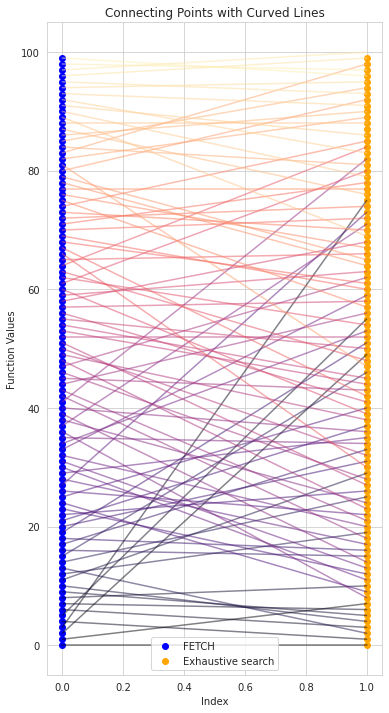

In [23]:
# Plot the points and connect with curved lines
fig, ax = plt.subplots(figsize=(6, 12))
# Set a seaborn color palette
sns.set_palette("magma", 102)
data_size = 100
x = np.arange(data_size)
# Sort the data based on functions f and g
f_sorted_indices = np.argsort(test_auc_fetch)
g_sorted_indices = np.argsort(np.argsort(test_auc_scratch))

test_auc_fetch_sorted = np.sort(test_auc_fetch)
test_auc_scratch_sorted = np.sort(test_auc_scratch)


# Plot left side points (sorted by function f)
ax.scatter([0] * data_size, x, label='FETCH', color='blue')

# Plot right side points (sorted by function g)
ax.scatter([1] * data_size, x, label='Exhaustive search', color='orange')

# Connect corresponding points with curved lines
for i in range(data_size):
    line_color = sns.color_palette()[i % len(sns.color_palette())]
    ax.plot([0, 1], [i, g_sorted_indices[f_sorted_indices[i]]], color=line_color, linestyle='-', alpha=0.5)

# Customize the plot
ax.set_xlabel('Index')
ax.set_ylabel('Function Values')
ax.legend()
plt.title('Connecting Points with Curved Lines')

plt.savefig('../../output/FETCH/rank_preservation_{}node.png'.format(fetch_vs_scratch_nodes), dpi=300, bbox_inches='tight')


In [24]:
# use spearman correlation to measure the rank preservation
from scipy.stats import spearmanr

spearmanr(test_auc_fetch, test_auc_scratch)

SpearmanrResult(correlation=0.810371442626844, pvalue=5.936673808532552e-25)

## 5.5 E-glass

In [25]:
from utils import get_df_with_num_nodes
df_full = get_df_with_num_nodes(4)
e_glass = df_full[df_full['channel_set'] == {1, 9}]
e_glass

,channel_list,channel_set,channel_id,channel_mask,num_channels_wearable,number_nodes
155,"[1, 9]","{1, 9}",155,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,4


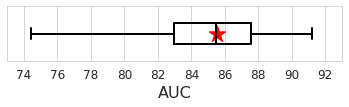

In [26]:
df_fetch = pd.read_csv('../../output/df/FETCH_4nodes.csv')

# create a box plot of df_fetch in test_auc then make a marker for test_auc of e_glass which has channel_id = 155
# Let's get the test_auc of e_glass
e_glass_df = df_fetch[df_fetch['channel_id'] == 155]
fig, ax = plt.subplots(figsize=(6, 1))
ax.boxplot(df_fetch['val_auc']*100,  vert = False, showmeans=False, showfliers=False, whis=[0, 100], boxprops= dict(linewidth=2.0, color='black'), whiskerprops = dict(linestyle='-',linewidth=2.0
, color='black'), medianprops = dict(linestyle='-',linewidth=2.0, color='black'), capprops=dict(linestyle='-',linewidth=2.0, color='black'), widths=0.4)
# make the box plot lines thick

ax.scatter(y=1, x=e_glass_df['val_auc']*100, color='red', marker='*', s=300)
# ax.set_title('E-glass in the distribution of all 4-node wearables')
ax.set_ylabel(None)
# ax.set_yticklabels(['4-node wearables'], fontsize=16)
ax.set_xlabel('AUC', fontsize=16)
ax.set_yticks([])
# Format of x ticks with 1 decimal
ax.set_xticks(np.arange(74, 92.5, 2), minor=False)
ax.set_xticklabels(np.arange(74, 93, 2), fontsize=12)
ax.set_xlim(73, 93)
# ax.annotate('E-glass', xy=(1.05, e_glass_df['test_auc']-0.002), fontsize=16, color='red')
plt.savefig('../../output/FETCH/boxplot_e_glass.png', dpi=300, bbox_inches='tight')

In [27]:
# get the perventile of e_glass
np.percentile(df_fetch['val_auc'], 52.2), e_glass_df['val_auc']


(0.8553650790482857,
 112    0.855322
 Name: val_auc, dtype: float64)

### Headband

In [28]:
df_full = get_df_with_num_nodes(10)
df_fetch10 = pd.read_csv('../../output/df/FETCH_10nodes.csv')
headband = df_full[df_full['channel_set'] == {0, 1, 2, 3, 8, 9, 10, 11}]
headband_id = headband['channel_id'].tolist()[0]
headband_df = df_fetch10[df_fetch10['channel_id'] == headband_id]
headband_df

,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
6820,26549,0,0.913094,FETCH,model_10nodes,10


[]

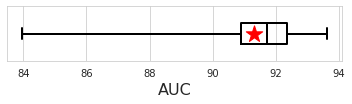

In [29]:
# Let's plot
fig, ax = plt.subplots(figsize=(6, 1))
ax.boxplot(df_fetch10['test_auc']*100,  vert = False, showmeans=False, showfliers=False, whis=[0, 100], boxprops= dict(linewidth=2.0, color='black'), whiskerprops = dict(linestyle='-',linewidth=2.0    , color='black'), medianprops = dict(linestyle='-',linewidth=2.0, color='black'), capprops=dict(linestyle='-',linewidth=2.0, color='black'), widths=0.4)    
ax.scatter(y=1, x=headband_df['test_auc']*100, color='red', marker='*', s=300)
ax.set_ylabel(None)
ax.set_xlabel('AUC', fontsize=16)
ax.set_yticks([])

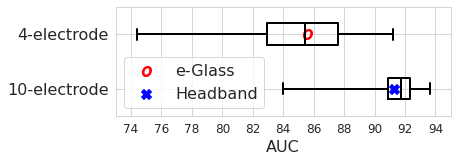

In [30]:
# Let's make two plots together
fig, ax = plt.subplots(figsize=(6, 2))
ax.boxplot(df_fetch10['test_auc']*100,  vert = False, showmeans=False, showfliers=False, whis=[0, 100], boxprops= dict(linewidth=2.0, color='black'), whiskerprops = dict(linestyle='-',linewidth=2.0    , color='black'), medianprops = dict(linestyle='-',linewidth=2.0, color='black'), capprops=dict(linestyle='-',linewidth=2.0, color='black'), widths=0.4, positions=[0.5])
ax.boxplot(df_fetch['val_auc']*100,  vert = False, showmeans=False, showfliers=False, whis=[0, 100], boxprops= dict(linewidth=2.0, color='black'), whiskerprops = dict(linestyle='-',linewidth=2.0    , color='black'), medianprops = dict(linestyle='-',linewidth=2.0, color='black'), capprops=dict(linestyle='-',linewidth=2.0, color='black'), widths=0.4, positions=[1.5])

ax.set_ylabel(None)
ax.set_xlabel('AUC', fontsize=16)
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['10-electrode', '4-electrode'], fontsize=16)
ax.set_xticks(np.arange(74, 94.5, 2), minor=False)
ax.set_xticklabels(np.arange(74, 95, 2), fontsize=12)
ax.set_xlim(73, 95)
# add scatters with legend
ax.scatter(y=1.5, x=e_glass_df['val_auc']*100, color='red', marker='$o$', s=100, label='e-Glass')
ax.scatter(y=0.5, x=headband_df['test_auc']*100, color='blue', marker='X', s=100, label='Headband')

ax.legend(loc='lower left', fontsize=16)
plt.savefig('../../output/FETCH/boxplot_e_glass_headband.png', dpi=300, bbox_inches='tight')


In [31]:
np.percentile(df_fetch10['test_auc'], 36), headband_df['test_auc']

(0.9132582762527744,
 6820    0.913094
 Name: test_auc, dtype: float64)

# Timing analysis

In [32]:
condition = (df_scratch_SBS_SFS['experiment_name'] == 'SFS') & (df_scratch_SBS_SFS['number_nodes'] == 6)
df_scratch_SBS_SFS[condition]

,Unnamed: 0,channel_id,val_auc,test_auc,experiment_name,model_name,number_nodes
128,128,6451,0.840961,0.821172,SFS,model_12_0.8409609424001878,6
129,129,5402,0.842267,0.848756,SFS,model_2_0.8422668796443906,6


In [33]:
# get distance between two timestamps
# I give the timestamp in the format of '2020-12-01 00:00:00.000000'
from datetime import datetime
def get_time_diff(t1, t2):
    t1 = datetime.strptime(t1, '%Y-%m-%d %H:%M:%S.%f')
    t2 = datetime.strptime(t2, '%Y-%m-%d %H:%M:%S.%f')
    return (t2 - t1).total_seconds()

In [34]:
# SBS, 8 nodes
get_time_diff('2024-01-16 23:00:00.000000', '2024-01-17 11:22:00.000000') / 3600

12.366666666666667

In [35]:
for num_nodes in range(2, 19):
    print(f'Number of nodes: {num_nodes}')
    print("Length ", len(get_df_with_num_nodes(num_nodes)))


Number of nodes: 2
Length  20
Number of nodes: 3
Length  26
Number of nodes: 4
Length  170
Number of nodes: 5
Length  351
Number of nodes: 6
Length  946
Number of nodes: 7
Length  1891
Number of nodes: 8
Length  3446
Number of nodes: 9
Length  5381
Number of nodes: 10
Length  7258
Number of nodes: 11
Length  8291
Number of nodes: 12
Length  7922
Number of nodes: 13
Length  6199
Number of nodes: 14
Length  3848
Number of nodes: 15
Length  1820
Number of nodes: 16
Length  619
Number of nodes: 17
Length  139
Number of nodes: 18
Length  18


# 5.3 Design cost

In [36]:
import networkx as nx
import pickle
with open('../../input/adj_mx_3d.pkl', 'rb') as pf:
    adj_mx_data = pickle.load(pf)
adj_mx = adj_mx_data[2]

In [37]:
node_id_dict = {}
for key, val in adj_mx_data[1].items():
    key = key.split(' ')[-1]
    node_id_dict[key] = val

In [38]:
from channel_possibility import double_banana
def get_distance_metric(row_present_channels, original_graph):
    node_set = set()  
    for bi_ch in row_present_channels:
        ch1, ch2 = double_banana[bi_ch]
        # add ch1 and ch2 to node_set
        node_set.add(ch1)
        node_set.add(ch2)
        
    shortest_path_list = []
    # Calculate the shortest path between each pair of nodes and append to shortest_path_list
    for node1 in node_set:
        for node2 in node_set:
            if node1 != node2:
                sh_path = nx.dijkstra_path_length(original_graph, node_id_dict[node1.upper()], node_id_dict[node2.upper()])
                shortest_path_list.append(sh_path)
    diameter = np.max(shortest_path_list)
    return diameter


In [39]:
# Create a graph from the weighted adjacency matrix
original_graph = nx.from_numpy_matrix(adj_mx, create_using=nx.DiGraph)
get_distance_metric([0, 11], original_graph)

0.8883646875619888

In [57]:
df_fetch = pd.read_csv('../../output/df/FETCH_2nodes.csv')
target_num_nodes = [3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_nodes in target_num_nodes:
    print(f'Number of nodes: {num_nodes}')
    df = pd.read_csv(f'../../output/df/FETCH_{num_nodes}nodes.csv')
    df_fetch = pd.concat([df_fetch, df])

df_full = get_df_with_num_nodes(2)
for num_nodes in target_num_nodes:
    df = get_df_with_num_nodes(num_nodes)
    df_full = pd.concat([df_full, df])

df_full = pd.merge(df_full, df_fetch, on='channel_id', suffixes=('_full', '_fetch'), how='inner')

df_full.sample(n=5)

Number of nodes: 3
Number of nodes: 4
Number of nodes: 5
Number of nodes: 6
Number of nodes: 7
Number of nodes: 8
Number of nodes: 9
Number of nodes: 10
Number of nodes: 11


,channel_list,channel_set,channel_id,channel_mask,num_channels_wearable,number_nodes_full,val_auc,test_auc,experiment_name,model_name,number_nodes_fetch
15891,"[1, 2, 3, 5, 8, 9, 18]","{1, 2, 3, 5, 8, 9, 18}",16657,"[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...",7,10,0.000000,0.877941,FETCH,model_10nodes,10
13491,"[0, 3, 7, 11, 16, 17]","{0, 3, 7, 11, 16, 17}",11158,"[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",6,10,0.000000,0.918661,FETCH,model_10nodes,10
868,"[7, 8, 12, 13]","{8, 12, 13, 7}",1086,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, ...",4,6,0.900184,0.881926,FETCH,model_6nodes,6
15332,"[1, 6, 7, 9, 14, 18, 19]","{1, 6, 7, 9, 14, 18, 19}",15664,"[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, ...",7,10,0.000000,0.917174,FETCH,model_10nodes,10
14951,"[2, 3, 7, 9, 16, 17, 19]","{2, 3, 7, 9, 16, 17, 19}",14815,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",7,10,0.000000,0.902210,FETCH,model_10nodes,10


In [58]:
df_full['diameter'] = df_full['channel_list'].apply(get_distance_metric, args=(original_graph,))
df_full.sample(n=5)

,channel_list,channel_set,channel_id,channel_mask,num_channels_wearable,number_nodes_full,val_auc,test_auc,experiment_name,model_name,number_nodes_fetch,diameter
19069,"[5, 6, 11, 14, 15, 16, 17, 18, 19]","{5, 6, 11, 14, 15, 16, 17, 18, 19}",27002,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, ...",9,10,0.000000,0.929669,FETCH,model_10nodes,10,0.703143
21546,"[4, 5, 8, 11, 16, 17, 18, 19]","{4, 5, 8, 11, 16, 17, 18, 19}",19931,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",8,11,0.000000,0.916518,FETCH,model_11nodes,11,0.703143
21853,"[3, 4, 7, 12, 13, 14, 15, 19]","{3, 4, 7, 12, 13, 14, 15, 19}",20658,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, ...",8,11,0.000000,0.914153,FETCH,model_11nodes,11,0.703143
6210,"[1, 2, 3, 5, 18, 19]","{1, 2, 3, 5, 18, 19}",10264,"[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,8,0.900939,0.905716,FETCH,model_8nodes,8,0.645989
21772,"[3, 5, 8, 9, 10, 17, 18, 19]","{3, 5, 8, 9, 10, 17, 18, 19}",20482,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, ...",8,11,0.000000,0.909188,FETCH,model_11nodes,11,0.888365


In [59]:
# Power consumption
def get_power_consumption(num_nodes_wearable):
    processing_power = 5
    static_ADC = (1 + num_nodes_wearable // 8) * 2
    dynamic_ADC = 0.8 * num_nodes_wearable
    power_consumption = processing_power + static_ADC + dynamic_ADC
    return power_consumption

df_full['power_consumption'] = df_full['number_nodes_fetch'].apply(get_power_consumption)
df_full.sample(n=5)

,channel_list,channel_set,channel_id,channel_mask,num_channels_wearable,number_nodes_full,val_auc,test_auc,experiment_name,model_name,number_nodes_fetch,diameter,power_consumption
2717,"[3, 7, 9, 10, 11]","{3, 7, 9, 10, 11}",3806,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, ...",5,7,0.911139,0.907727,FETCH,model_7nodes,7,0.888365,12.6
7210,"[1, 7, 10, 16, 17]","{1, 7, 10, 16, 17}",4934,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",5,9,0.000000,0.911628,FETCH,model_9nodes,9,0.888365,16.2
13095,"[1, 2, 6, 10, 11, 12]","{1, 2, 6, 10, 11, 12}",9992,"[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",6,10,0.000000,0.927726,FETCH,model_10nodes,10,0.888365,17.0
19718,"[3, 4, 7, 10, 14, 17, 19]","{3, 4, 7, 10, 14, 17, 19}",13755,"[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, ...",7,11,0.000000,0.910810,FETCH,model_11nodes,11,0.703143,17.8
12093,"[3, 4, 9, 15, 16]","{3, 4, 9, 15, 16}",3968,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",5,10,0.000000,0.916922,FETCH,model_10nodes,10,0.888365,17.0


In [60]:
# Cost
df_full['cost'] = df_full['power_consumption'] * 0.1 + df_full['diameter'] * 1.0 + (1-df_full['test_auc']) * 10.0
df_full.sample(n=5)

,channel_list,channel_set,channel_id,channel_mask,num_channels_wearable,number_nodes_full,val_auc,test_auc,experiment_name,model_name,number_nodes_fetch,diameter,power_consumption,cost
26821,"[0, 1, 4, 5, 6, 9, 16, 17, 18]","{0, 1, 4, 5, 6, 9, 16, 17, 18}",32550,"[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...",9,11,0.0,0.859037,FETCH,model_11nodes,11,0.703143,17.8,3.892772
19248,"[0, 4, 5, 6, 13, 14, 17, 18, 19]","{0, 4, 5, 6, 13, 14, 17, 18, 19}",31154,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, ...",9,10,0.0,0.912371,FETCH,model_10nodes,10,0.703143,17.0,3.279434
6949,"[2, 11, 12, 16, 17]","{2, 11, 12, 16, 17}",4111,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...",5,9,0.0,0.911793,FETCH,model_9nodes,9,0.703143,16.2,3.205210
15388,"[1, 5, 9, 10, 11, 16, 18]","{1, 5, 9, 10, 11, 16, 18}",15758,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, ...",7,10,0.0,0.928242,FETCH,model_10nodes,10,0.888365,17.0,3.305949
10838,"[3, 6, 7, 8, 16, 18, 19]","{3, 6, 7, 8, 16, 18, 19}",13464,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",7,9,0.0,0.908172,FETCH,model_9nodes,9,0.888365,16.2,3.426649


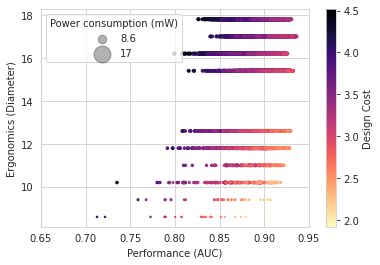

In [63]:
# def cost(perf, dia):
#     lambda_ = 100  # performance
#     beta_ = 0.1  # material usage
#     return lambda_ * (1-perf)**2 + beta_ * np.exp(dia)

# Contour for cost in df_full based on diameter, power_consumption, and test_auc

# Create a meshgrid for performance and diameter
# performance_range = np.linspace(min(df_full['test_auc']), max(df_full['test_auc']), 100)
# diameter_range = np.linspace(min(df_full['diameter']), max(df_full['diameter']), 100)
# performance_mesh, diameter_mesh = np.meshgrid(performance_range, diameter_range)
# 
# design_cost_mesh = cost(performance_mesh, diameter_mesh)


# Create the contour plot
# plt.contour(performance_mesh, diameter_mesh, design_cost_mesh, levels=30, cmap='RdGy')
# plt.colorbar(label='Design Cost')
# Add a legend for size of points
for power_consumption in [8.6, 17]:
    plt.scatter([], [], c='k', alpha=0.3, s=power_consumption**2,
                label=str(power_consumption))
# make the legend align right
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, title='Power consumption (mW)', loc='upper left', bbox_to_anchor=(0, 1))

plt.scatter(x=df_full['test_auc'],y=df_full['diameter'], 
            c=df_full['cost'], 
            marker='o', s=df_full['power_consumption']**2, cmap='magma_r')

plt.colorbar(label='Design Cost')
plt.xlabel('Performance (AUC)')
plt.ylabel('Ergonomics (Diameter)')
plt.xlim(0.65, 0.95)
plt.ylim(0, 1)
# plt.title('Contour Plot of Design Cost')
plt.savefig('../../output/FETCH/cost_contour.png', dpi=300, bbox_inches='tight')

17.8

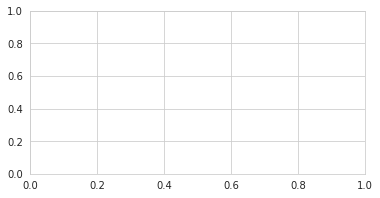

In [45]:
# Histogram of power consumption
fig, ax = plt.subplots(figsize=(6, 3))
# ax.hist(df_full['power_consumption'], bins=20, color='blue', edgecolor='black')
# min of power consumption
max(df_full['power_consumption'])

In [46]:

df_ready_4 = NSGA_df[NSGA_df['number_nodes'] == 4]
df_ready_4 = pd.concat([df_ready_4, df_scratch_SBS_SFS[df_scratch_SBS_SFS['number_nodes'] == 4]])

df_ready_4.drop_duplicates(subset=['channel_id'], keep='first', inplace=True)

df_full = get_df_with_num_nodes(4)
# Find the channel_ids in df_full but not in df_ready_4
ids = df_full[~df_full['channel_id'].isin(df_ready_4['channel_id'])]['channel_id'].tolist()